Loading datasets...
Red wine dataset loaded: 1599 rows and 12 columns

First 5 rows of the red wine dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.997

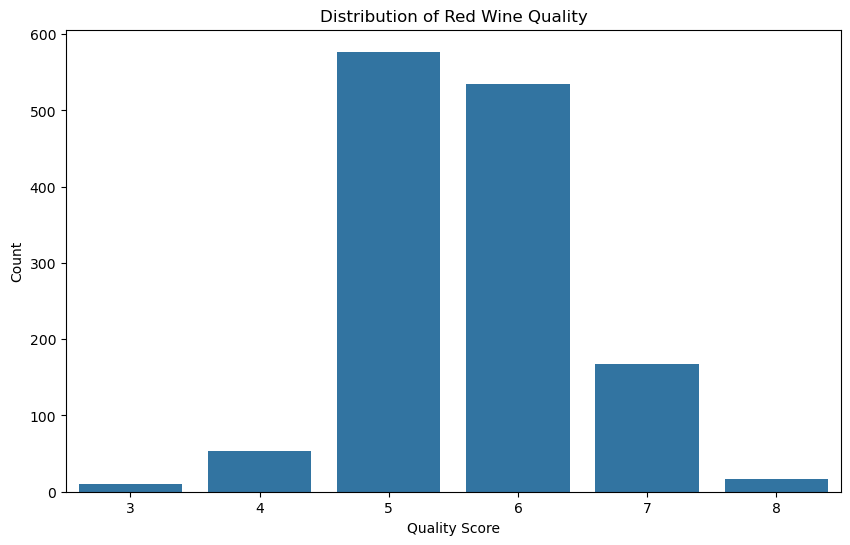

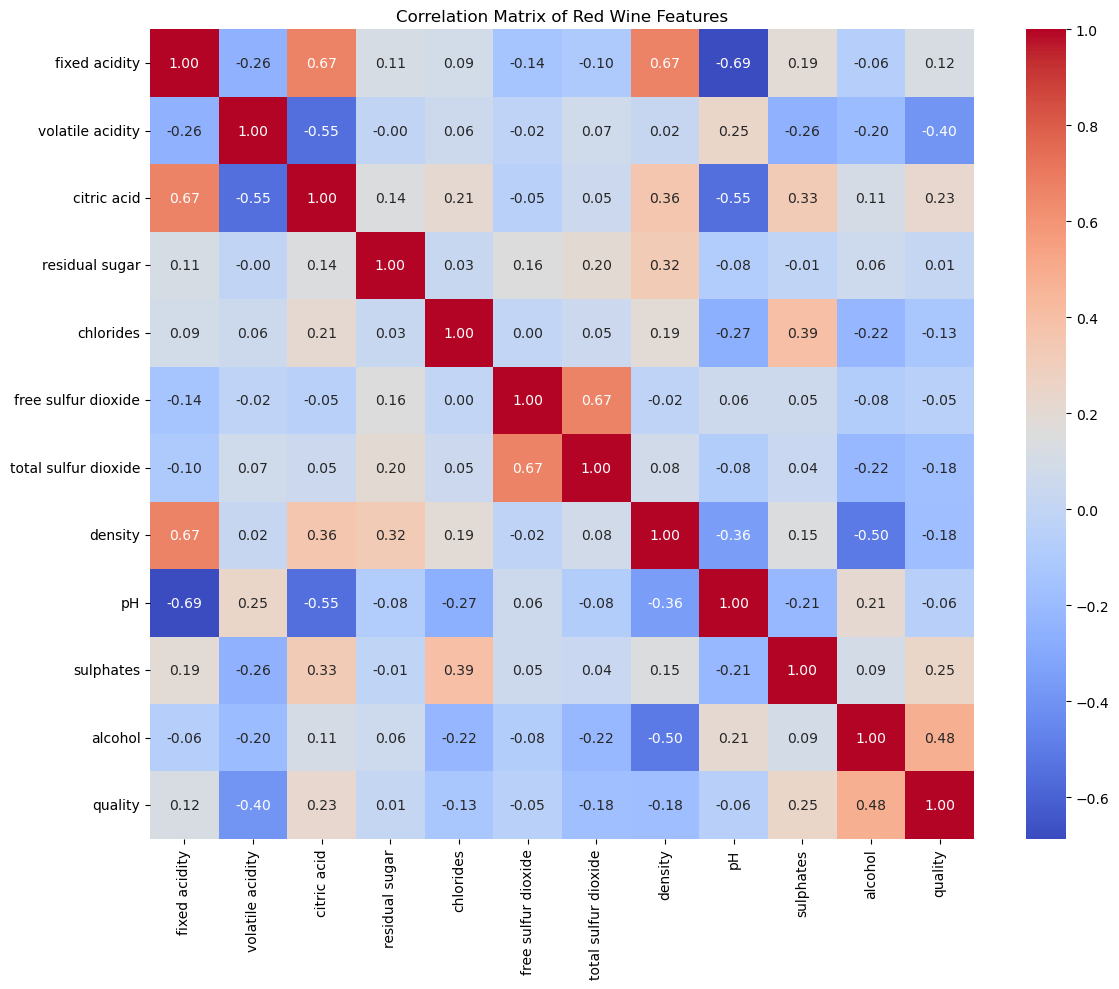


Feature selection based on correlation with quality:
quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

Encoding wine quality into categories (Bad, Normal, Good)...
Distribution of wine categories:
quality_category
0      63
1    1112
2     184
Name: count, dtype: int64


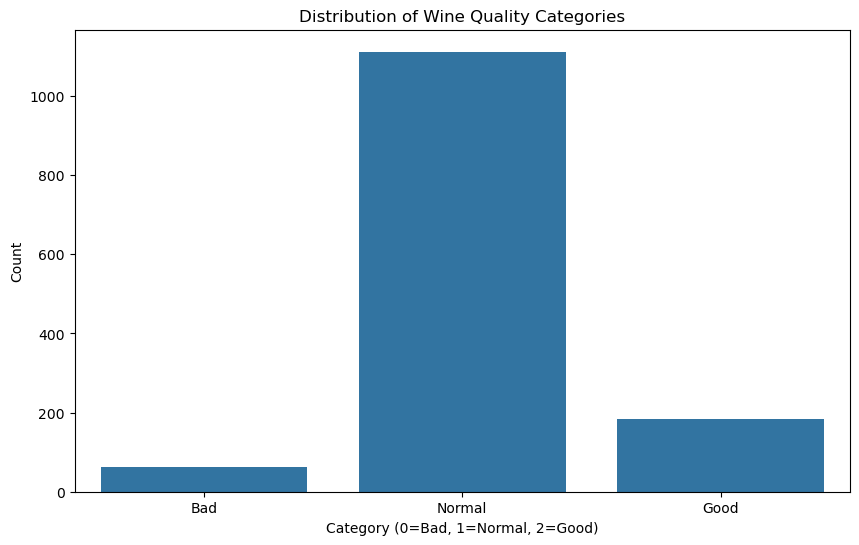


Standardizing the data...

Applying SMOTE to handle imbalanced data...
Class distribution before SMOTE:
quality_category
0     50
1    890
2    147
Name: count, dtype: int64
Original training data shape: (1087, 10)
Balanced training data shape: (2670, 10)
Class distribution after SMOTE:
quality_category
0    890
1    890
2    890
Name: count, dtype: int64


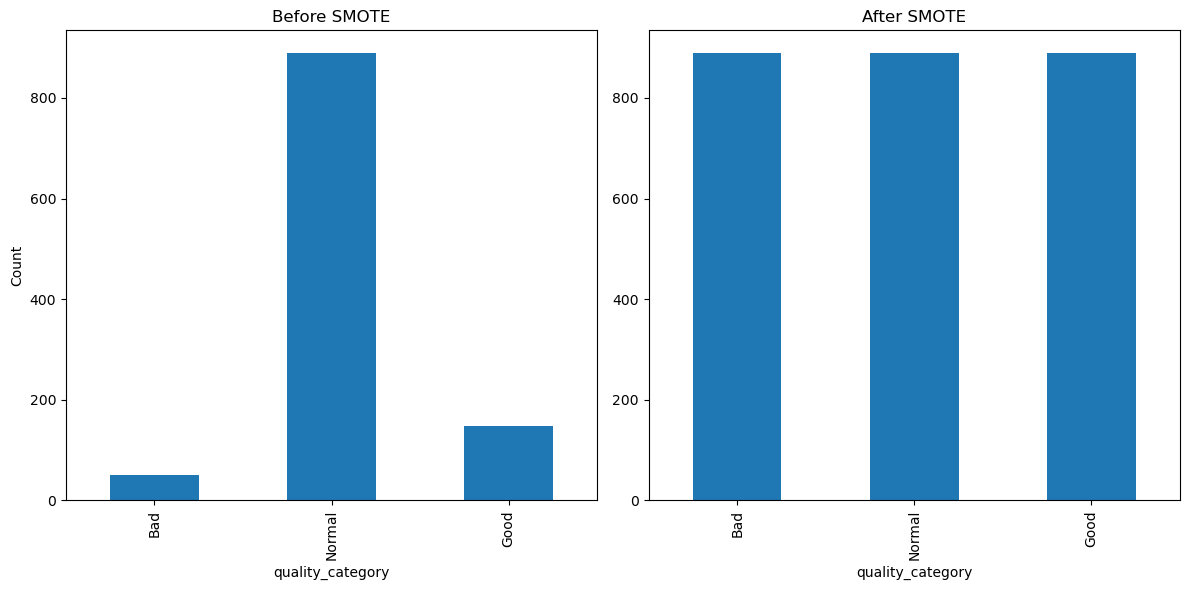


Saving preprocessed data...


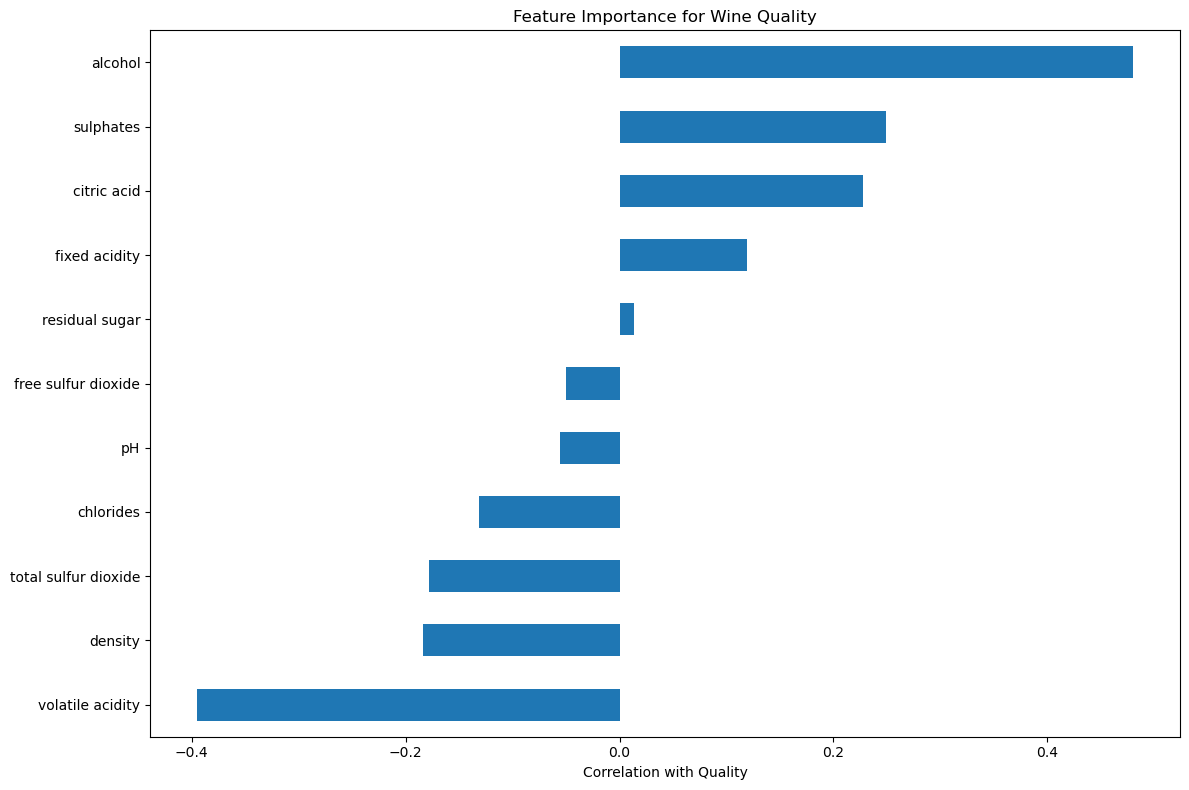


Preprocessing completed successfully!
Preprocessed data saved to CSV files:
- preprocessed_red_wine.csv (All standardized data)
- train_data_balanced.csv (SMOTE-balanced training data)
- test_data.csv (Test data)
Visualizations saved as PNG files


In [8]:
# Wine Quality Data Preprocessing
# Based on methodology from: "Wine feature importance and quality prediction:
# A comparative study of machine learning algorithms with unbalanced data"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Set random seed for reproducibility
np.random.seed(42)

# 1. Data Loading
print("Loading datasets...")

# This loads the red wine dataset - adjust path if needed
def load_wine_data(file_path):
    """
    Load wine quality data with proper handling of semicolon separation
    """
    # First, let's check how the CSV is actually structured
    with open(file_path, 'r', encoding='utf-8') as f:
        first_line = f.readline()
    
    if ';' in first_line:
        # The dataset is semicolon separated
        return pd.read_csv(file_path, sep=';')
    else:
        # Try comma separated
        return pd.read_csv(file_path)

# Try to load the data
try:
    red_wine = load_wine_data('wine+quality/winequality-red.csv')
    print(f"Red wine dataset loaded: {red_wine.shape[0]} rows and {red_wine.shape[1]} columns")
except Exception as e:
    print(f"Error loading red wine dataset: {e}")
    # Create a placeholder if unable to load
    red_wine = None

# 2. Data Exploration
if red_wine is not None:
    print("\nFirst 5 rows of the red wine dataset:")
    print(red_wine.head())
    
    print("\nSummary statistics:")
    print(red_wine.describe())
    
    # 3. Handle duplicate entries and missing values (as per section 3.2 of the paper)
    print("\nRemoving duplicate entries and handling missing values...")
    
    # Check and remove duplicates
    initial_rows = red_wine.shape[0]
    red_wine = red_wine.drop_duplicates()
    removed_duplicates = initial_rows - red_wine.shape[0]
    print(f"Removed {removed_duplicates} duplicate entries.")
    
    # Check for missing values
    print("Missing values before handling:")
    missing_values = red_wine.isnull().sum()
    print(missing_values)
    
    # Remove rows with missing values
    initial_rows = red_wine.shape[0]
    red_wine = red_wine.dropna()
    removed_missing = initial_rows - red_wine.shape[0]
    print(f"Removed {removed_missing} rows with missing values.")
    
    # 4. Data Visualization
    print("\nCreating exploratory visualizations...")
    
    # Distribution of wine quality
    plt.figure(figsize=(10, 6))
    sns.countplot(x='quality', data=red_wine)
    plt.title('Distribution of Red Wine Quality')
    plt.xlabel('Quality Score')
    plt.ylabel('Count')
    plt.show('red_wine_quality_distribution.png')
    plt.close()
    
    # Correlation matrix
    plt.figure(figsize=(12, 10))
    correlation_matrix = red_wine.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Red Wine Features')
    plt.tight_layout()
    plt.show('red_wine_correlation_matrix.png')
    plt.close()
    
    # 5. Feature Selection based on correlation with quality
    print("\nFeature selection based on correlation with quality:")
    quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
    print(quality_correlation)
    
    # As per the paper, select all features except residual sugar
    selected_features = [col for col in red_wine.columns if col != 'residual sugar' and col != 'quality']
    
    # 6. Label Encoding (categorizing wine quality as per section 3.2 of the paper)
    print("\nEncoding wine quality into categories (Bad, Normal, Good)...")
    
    def encode_quality(quality):
        """
        Encode wine quality into categories as specified in section 3.2:
        - Bad wine: quality < 5
        - Normal wine: 5 <= quality <= 6
        - Good wine: 7 <= quality <= 10
        """
        if quality < 5:
            return 0  # Bad wine
        elif 5 <= quality <= 6:
            return 1  # Normal wine
        else:  # quality >= 7
            return 2  # Good wine
    
    red_wine['quality_category'] = red_wine['quality'].apply(encode_quality)
    
    # Check distribution after encoding
    print("Distribution of wine categories:")
    category_counts = red_wine['quality_category'].value_counts().sort_index()
    print(category_counts)
    
    # Visualize the distribution of categories
    plt.figure(figsize=(10, 6))
    sns.countplot(x='quality_category', data=red_wine)
    plt.title('Distribution of Wine Quality Categories')
    plt.xlabel('Category (0=Bad, 1=Normal, 2=Good)')
    plt.ylabel('Count')
    plt.xticks([0, 1, 2], ['Bad', 'Normal', 'Good'])
    plt.show('wine_quality_categories.png')
    plt.close()
    
    # 7. Data Standardization
    print("\nStandardizing the data...")
    
    X = red_wine[selected_features]
    y = red_wine['quality_category']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=selected_features)
    
    # 8. Handling imbalanced data using SMOTE
    print("\nApplying SMOTE to handle imbalanced data...")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )
    
    print("Class distribution before SMOTE:")
    print(pd.Series(y_train).value_counts().sort_index())
    
    smote = SMOTE(random_state=42)
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
    
    print(f"Original training data shape: {X_train.shape}")
    print(f"Balanced training data shape: {X_train_balanced.shape}")
    print("Class distribution after SMOTE:")
    print(pd.Series(y_train_balanced).value_counts().sort_index())
    
    # Visualize class distribution before and after SMOTE
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    pd.Series(y_train).value_counts().sort_index().plot(
        kind='bar', ax=ax[0], title='Before SMOTE'
    )
    ax[0].set_xticklabels(['Bad', 'Normal', 'Good'])
    ax[0].set_ylabel('Count')
    
    pd.Series(y_train_balanced).value_counts().sort_index().plot(
        kind='bar', ax=ax[1], title='After SMOTE'
    )
    ax[1].set_xticklabels(['Bad', 'Normal', 'Good'])
    plt.tight_layout()
    plt.show('smote_comparison.png')
    plt.close()
    
    # 9. Save the preprocessed data
    print("\nSaving preprocessed data...")
    
    # Save original standardized data
    preprocessed_data = X_scaled_df.copy()
    preprocessed_data['quality_category'] = y
    preprocessed_data.to_csv('preprocessed_red_wine.csv', index=False)
    
    # Save train-test split data
    train_data = pd.DataFrame(X_train_balanced, columns=selected_features)
    train_data['quality_category'] = y_train_balanced
    train_data.to_csv('train_data_balanced.csv', index=False)
    
    test_data = pd.DataFrame(X_test, columns=selected_features)
    test_data['quality_category'] = y_test
    test_data.to_csv('test_data.csv', index=False)
    
    # 10. Plot feature importance based on correlation
    plt.figure(figsize=(12, 8))
    quality_correlation = quality_correlation.drop('quality')  # Remove self-correlation
    quality_correlation.sort_values().plot(kind='barh')
    plt.title('Feature Importance for Wine Quality')
    plt.xlabel('Correlation with Quality')
    plt.tight_layout()
    plt.show('wine_feature_importance.png')
    plt.close()
    
    print("\nPreprocessing completed successfully!")
    print("Preprocessed data saved to CSV files:")
    print("- preprocessed_red_wine.csv (All standardized data)")
    print("- train_data_balanced.csv (SMOTE-balanced training data)")
    print("- test_data.csv (Test data)")
    print("Visualizations saved as PNG files")

else:
    print("Unable to proceed with preprocessing due to data loading errors.")
